![title](cabecera.png)

In [1046]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.integrate import quad
%matplotlib inline

# Punto 1

In [1047]:
Dist=[0.032,0.034,0.214,0.263,0.275,0.275,0.45,0.5,0.5,0.63,0.8,0.9,0.9,0.9,0.9,1.0,1.1,1.1,1.4,1.7,2.0,2.0,2.0,2.0]
Vd=[170,290,-130,-70,-185,-220,200,290,270,-200,300,-30,650,150,500,920,450,500,500,960,500,850,800,1090]

# convirtiendo los datos en un array
Dist=np.array(Dist)
Vd=np.array(Vd)

In [1048]:
#help(stats.linregress)
H0,intercept,rvalue,pvalue,stderr=stats.linregress(Dist,Vd) # ajuste por mínimos cuadrados
H0

465.90284231339825

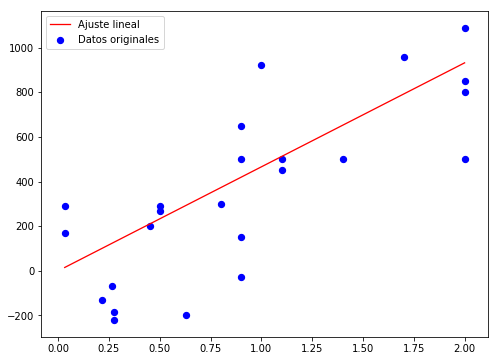

In [1049]:
plt.figure(figsize=(8,6))
plt.subplot(111)

Vd_recons=H0*Dist
plt.plot(Dist,Vd_recons, color="red", linewidth=1.3, linestyle="-",label = 'Ajuste lineal')
plt.scatter(Dist, Vd, color="blue", linewidth=1.3, linestyle="-",label = 'Datos originales')
plt.legend()
plt.savefig("punto1.pdf")
plt.show()

# Punto 2

In [859]:
Dist_Hum=[1.6,6.8,8.3,8.6,9.4,13.4,21.1,35.1,1.8,10.2,12.0,12.5,43.0,41.2,34.0,75.3,27.6,69.9,37.6,16.5,22.2]
Vd_Hum=[890,3810,4630,4820,5230,7500,11800,19600,1000,5700,6700,7000,24000,23000,19000,42000,15400,39000,21000,9200,12400]

In [860]:
Dist_Hum=np.array(Dist_Hum)
Vd_Hum=np.array(Vd_Hum)
Dist_total=np.concatenate((Dist, Dist_Hum), axis=0)   # concatenaciónos datos datos de Tabla I. Hubble-1929
Vd_total=np.concatenate((Vd, Vd_Hum), axis=0)

In [862]:
H0_H,intercept_H,rvalue,pvalue,stderr=stats.linregress(Dist_total,Vd_total)
H0_H

560.7327769029091

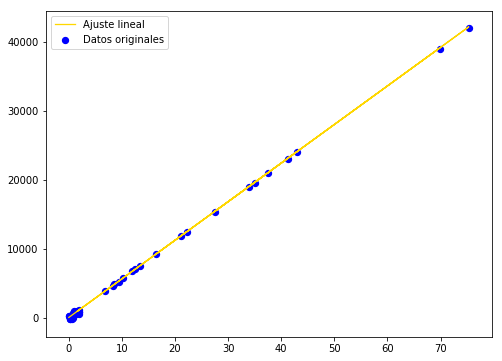

In [863]:
plt.figure(figsize=(8,6))
plt.subplot(111)


Vd_reconsH=H0_H*Dist_total

Vd_recons=H0*Dist
plt.plot(Dist_total,Vd_reconsH, color="gold", linewidth=1.3, linestyle="-",label = 'Ajuste lineal')
plt.scatter(Dist_total, Vd_total, color="blue", linewidth=1.3, linestyle="-",label = 'Datos originales')
plt.legend()
plt.savefig("punto2.pdf")
plt.show()



# Punto 3

In [874]:
Dist3=[15,97,32,145,50,122,58,91,120,93,158,64,145,61,103,46,34,185,20]
Vd3=[1100,6700,2400,10700,3100,9900,4300,5300,9000,7500,8900,5300,9600,3300,5100,3600,1800,9500,1200]
Dist3=np.array(Dist3)
Vd3=np.array(Vd3)

In [875]:
H03,intercept3,rvalue,pvalue,stderr=stats.linregress(Dist3,Vd3)
H03

60.34548550996037

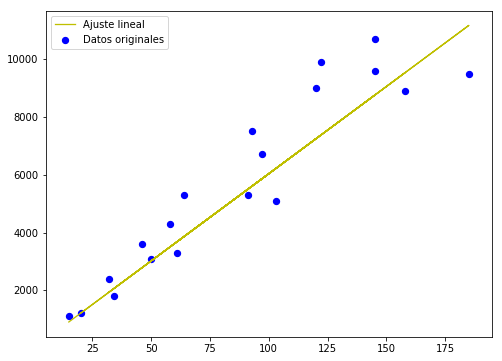

In [876]:
plt.figure(figsize=(8,6))
plt.subplot(111)


Vd_recons3=H03*Dist3

Vd_recons=H0*Dist
plt.plot(Dist3,Vd_recons3, color="y", linewidth=1.3, linestyle="-",label = 'Ajuste lineal')
plt.scatter(Dist3, Vd3, color="blue", linewidth=1.3, linestyle="-",label = 'Datos originales')
plt.legend()
plt.savefig("punto3.pdf")
plt.show()


In [882]:
mu3 = 5*np.log10(Dist3)+25    # Mapeo de distancia  DL a mu
mu3 

array([30.8804563 , 34.93385867, 32.52574989, 35.80684001, 33.49485002,
       35.43179915, 33.81713997, 34.79520696, 35.39590623, 34.84241474,
       35.99328543, 34.03089987, 35.80684001, 33.92664918, 35.06418612,
       33.31378916, 32.65739459, 36.33585864, 31.50514998])

In [883]:
zp3= Vd_recons3/3e+5 
zp3

array([0.00301727, 0.01951171, 0.00643685, 0.02916698, 0.01005758,
       0.0245405 , 0.01166679, 0.0183048 , 0.02413819, 0.0187071 ,
       0.03178196, 0.0128737 , 0.02916698, 0.01227025, 0.02071862,
       0.00925297, 0.00683916, 0.03721305, 0.00402303])

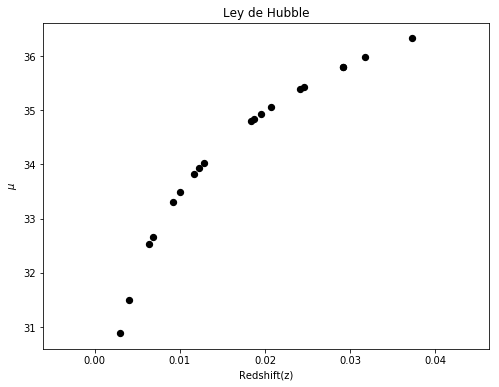

In [1052]:
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.title('Ley de Hubble')
plt.ylabel('$\mu$')
plt.xlabel('Redshift(z)')
plt.scatter(zp3,mu3, color="black", linewidth=1.3, linestyle="-")
plt.savefig("punto5red.pdf")
plt.show()

# Punto 4

In [998]:
data = pd.read_csv('datos4.csv')

In [999]:
data.head(10)


,Objeto,Redshift,Distancia,error_distancia
0,1993ah,0.028488,35.346583,0.223906
1,1993ag,0.050043,36.682368,0.166829
2,1993o,0.052926,36.817691,0.155756
3,1993b,0.070086,37.446737,0.158467
4,1992bs,0.062668,37.483409,0.156099
5,1992br,0.087589,38.229057,0.187746
6,1992bp,0.078577,37.488162,0.155636
7,1992bo,0.017227,34.654370,0.199337
8,1992bl,0.042233,36.336460,0.167174
9,1992bh,0.045295,36.640272,0.164981


In [1000]:
redshift=data['Redshift'].values
DL=data['Distancia'].values
error=data['error_distancia'].values

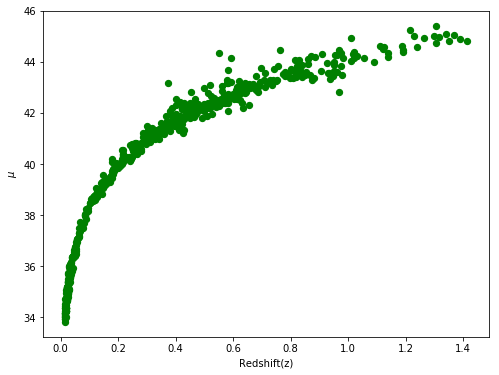

In [1053]:
plt.figure(figsize=(8,6))
plt.subplot(111)

plt.scatter(redshift, DL,color="g",linewidth=1.3, linestyle="-")
plt.ylabel('$\mu$')
plt.xlabel('Redshift(z)')
plt.savefig("punto4.pdf")
plt.show()


# Punto 5


Definimos una función para calcular la integral I 

In [1002]:
def argI(z,Sm,So,Sk):
    # z <-- redshift,  Sm <-- materia,   So <-- E. oscura
    return 1/np.sqrt(Sm*(1+z)**3 + So + Sk*(1+z)**2)

Definimos una función para el modelo teórico 

In [1003]:
def Distance_z(z,Sm,So,Sk,H0,r):
    c=3e+5              # velocidad de la luz
    I=r[0]-r[1]           # dado que argI retorna dos valores es necesario la resta del lim. superior y lim. inferior
    if((Sm+So)>1):
        DL5 = ((1+z)*c/H0)*(1/np.sqrt(np.abs(Sk)))*np.sin(np.sqrt(np.abs(Sk))*I)
    elif((Sm+So)==1):
        DL5 = ((1+z)*c/H0)*I
    elif((Sm+So)<1):
        DL5 = ((1+z)*c/H0)*(1/np.sqrt(np.abs(Sk)))*np.sinh(np.sqrt(np.abs(Sk))*I)
    return DL5

Análisis para los distintos casos planteados de Sm, So, Sk

In [1004]:
Sm = [0.3,0.3,0.28]
So = [0,1.0,0.72]
Sk = [0.7,-0.3,0]
DL5=np.zeros((len(DL),3))   # Creando un vector para las distancias calculadas segun modelo teórico

for i in np.arange(0,3):
    for j in np.arange(0,len(DL)):
        r = quad(argI, 0, redshift[j], args=(Sm[i],So[i],Sk[i]))     # me retorna dos valores correspondiente a los intervalos de la integral
        aux=Distance_z(redshift[j],Sm[i],So[i],Sk[i],68,r)
        DL5[j,i]=aux

Modulo de distancia, $\mu$, se relaciona con $D_L$ así

$\mu = 5 \log_{10}(D_L) + 25$

In [1005]:
mu = 5*np.log10(DL5)+25    # Mapeo de distancia  DL a mu

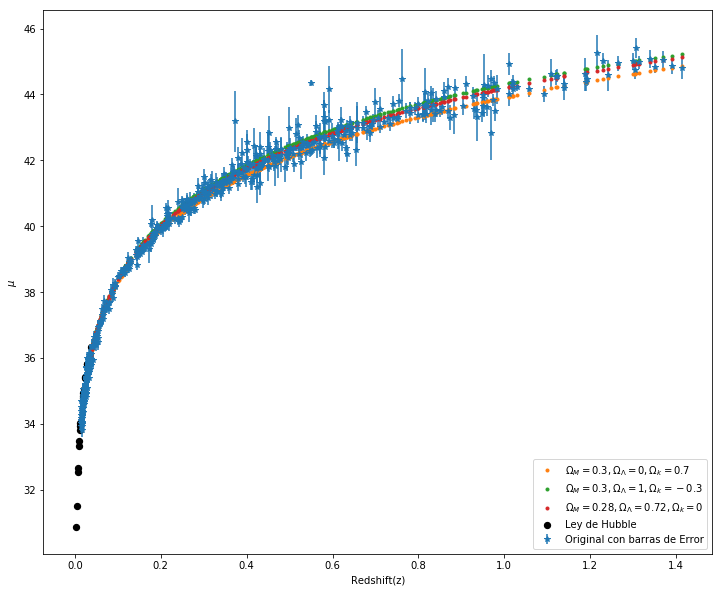

In [1006]:
fig = plt.figure(figsize=(12,10))
plt.subplot(111)

plt.errorbar(redshift,DL,yerr=error,fmt='*',label='Original con barras de Error')
plt.plot(redshift,mu[:,0],'.',label='$\Omega_{M}=0.3,\Omega_{\Lambda}=0,\Omega_{k}=0.7$',linewidth=1.3)
plt.plot(redshift,mu[:,1],'.',label='$\Omega_{M}=0.3,\Omega_{\Lambda}=1,\Omega_{k}=-0.3$',linewidth=1.3)
plt.plot(redshift,mu[:,2],'.',label='$\Omega_{M}=0.28,\Omega_{\Lambda}=0.72,\Omega_{k}=0$',linewidth=1.3)
plt.scatter(zp3,mu3, color="black", linewidth=1.3, linestyle="-",label='Ley de Hubble')

plt.legend(loc='lower right')
plt.ylabel('$\mu$')
plt.xlabel('Redshift(z)')
plt.savefig("punto5.pdf")

plt.show()

# Punto 6

In [1007]:
from scipy.optimize import minimize

In [1054]:
def cost_function(S):    # Crenado nuestra función objetivo
    global redshift,DL  # datos de la tabla leida
    DL6=np.zeros((1,len(DL)))
    for j in np.arange(0,len(DL)):
        r = quad(argI, 0, redshift[j], args=(S[0],S[1],S[2]))   # esta función retona la integral I 
        aux= Distance_z(redshift[j],S[0],S[1],S[2],68,r)  # Calculando la distancia segun los parametros cosmólogicos
        mu = 5*np.log10(aux)+25   # Mapeando las distancias DL a mu, para poder ajustar con los datos de la tabla
        DL6[0,j]=mu
    aux2= np.sum(np.multiply((DL6-DL)**2,1/error**2),axis=1)  # error a minimizar
    return aux2

def constraint1(S):
    return S[0]+S[1]+S[2]-1   # condición de igualdad
def constraint2(S):
    return 1-S[1]+(4/3)*S[0]   # condición de igualdad
def constraint3(S):
    return S[1]-(3/2)*S[0]+4.5   # condición de igualdad

In [1055]:
S0=[0.3,0,0.7]   # punto inicial
cost_function(S0)  # error para punto inicial

array([1174.04609578])

In [1010]:
rest1={'type':'eq','fun':constraint1}   # Añadiendo las restricciones para los parámetros
rest2={'type':'ineq','fun':constraint2}
rest3={'type':'ineq','fun':constraint3}

restriccion=[rest1,rest2,rest3]

In [1056]:
rm=(0,3)  # intervalo para sigma_M
ro=(-3,3) # intervalo para sigma_lambda
rk=(-0.5,0.5) # intervalo para sigma_k
bnds=(rm,ro,rk)
sol = minimize(cost_function,S0,method='SLSQP',bounds=bnds,constraints=restriccion)
sol.x   # retorna el mejor conjunto de parametrós que reduce el error cuadratico medio

array([0.12551785, 0.37448215, 0.5       ])

# Punto 7 Monte-Carlo

In [952]:
it= 1000   # numero de iteraciones de Monte-Carlo
delta=0.05
# punto inicial 
x=np.zeros((3,1))
y=np.zeros((3,1))

error1=np.zeros((1,1))
error2=np.zeros((1,1))
#x[0]=np.random.uniform(0,3)   #sigma_m
#x[1]=np.random.uniform(-3,3)   #sigma_lambda
x[0]=1.5
x[1]=-0.5
# evaluando el error con el punto inicial
x[2]=1-x[0]-x[1]
lims_a=constraint2(x)
limi_a=constraint3(x)
# Constraint para limitar los valores de sigma
while ((lims_a<0) or (limi_a<0)):
    x[0]=np.random.uniform(0,3,1)   #sigma_m
    x[1]=np.random.uniform(-3,3,1)   #sigma_lambda
    x[2]=1-x[0]-x[1]
    lims_a=constraint2(x)
    limi_a=constraint3(x)
    
solver_m=np.zeros((1,1))
solver_o=np.zeros((1,1))   
solver_m[0]=x[0]
solver_o[0]=x[1] 
error1=cost_function(x)
print('error_inicial',error1) 
cont=0
for i in np.arange(0,it):
    y[0]=np.random.uniform(x[0]-delta,x[0]+delta)   #sigma_m nuevo
    y[1]=np.random.uniform(x[1]-delta,x[1]+delta)   #sigma_lambda nuevo
    y[2]=1-y[0]-y[1]
    lims_n=constraint2(y)
    limi_n=constraint3(y)
    
    while ((lims_n<0) or (limi_n<0) or (y[0] >3) or (y[0] <0) or (y[1] >3) or (y[1] <-3)):
        y[0]=np.random.uniform(x[0]-delta,x[0]+delta)   #sigma_m nuevo
        y[1]=np.random.uniform(x[1]-delta,x[1]+delta)   #sigma_lambda nuevo
        y[2]=1-y[0]-y[1]
        lims_n=constraint2(y)
        limi_n=constraint3(y)

   
    error2=cost_function(y)
    error_t=error1+error2
        
    if (error2 < error1):
        error1=error2
        x[0]=y[0]
        x[1]=y[1]
        x[2]=y[2]
        solver_m=np.append(solver_m,y[0])
        solver_o=np.append(solver_o,y[1])    
    else:  
        moneda=np.random.binomial(1,0.8) #condicion para si me quedo (1) en el nuevo paso o retrocedo (0)#(1-error2/error_t)
        if (moneda == 0):
            error1=error2
            x[0]=y[0]
            x[1]=y[1]
            x[2]=y[2]
            solver_m=np.append(solver_m,y[0])
            solver_o=np.append(solver_o,y[1])
            
    

error_inicial [697.80775761]


### Mejor  conjunto de parámetros $\Omega_M,\Omega_\Lambda$ 

In [1042]:
x

array([0.12, 0.36])

## Datos para gráfica 1 

In [ ]:
aux7_3=np.zeros((1,len(solver_m)))
aux7_3=solver_m
aux7o_3=np.zeros((1,len(solver_o)))
aux7o_3=solver_o

## Datos para gráfica 2

In [926]:
aux7=np.zeros((1,len(solver_m)))
aux7=solver_m
aux7o=np.zeros((1,len(solver_o)))
aux7o=solver_o

## Datos para gráfica 3

In [950]:
aux7_2=np.zeros((1,len(solver_m)))
aux7_2=solver_m
aux7o_2=np.zeros((1,len(solver_o)))
aux7o_2=solver_o

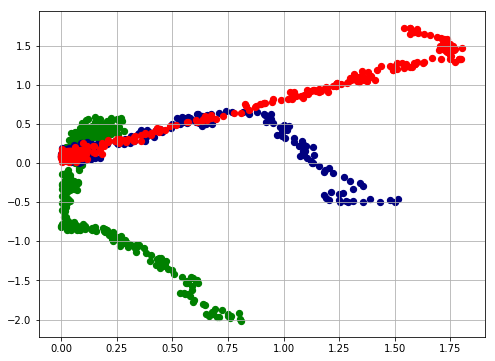

In [954]:
plt.figure(figsize=(8,6))
plt.subplot(111)

plt.scatter(aux7, aux7o,color="g",linewidth=1.3, linestyle="-",label='Monte-Carlo I')
plt.scatter(solver_m, solver_o,color="navy",linewidth=1.3, linestyle="-",label='Monte-Carlo II')
plt.scatter(aux7_2, aux7o_2,color="r",linewidth=1.3, linestyle="-",label='Monte-Carlo III')
plt.legend
plt.grid()
plt.savefig("punto7_best.pdf")
plt.show()

# Punto 8

In [1012]:
sm=np.arange(0,3,0.1)
so=np.arange(-3,3,0.1)
smr=np.matlib.repmat(sm,len(so),1).transpose()   #creando cradricula
sor=np.matlib.repmat(so,len(sm),1)
vm=np.ravel(smr)
vo=np.ravel(sor)
const1=vo-4/3*vm<1
const2=vo-3/2*vm>-4.5

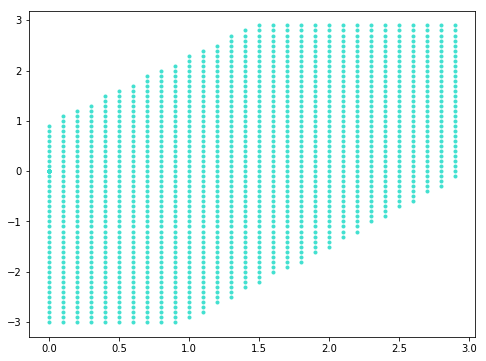

In [1013]:
gridx=np.ravel(smr)*const1*const2
gridy=np.ravel(sor)*const1*const2

plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(gridx,gridy,'.',color="turquoise")
plt.savefig("punto8_1.pdf")
plt.show()


### Creando matriz $x^2$ 

In [978]:
shi=np.zeros([len(so),len(sm)])
D=np.zeros((3,1))
for i in np.arange(len(so)):
    for j in np.arange(len(sm)):
        D[0]=smr[j,i]
        D[1]=sor[j,i]
        D[2]=1-D[0]-D[1]
        if ((constraint2(D)>0) and (constraint3(D)>0)):
            shi[i,j]=cost_function(D)
        else:
            shi[i,j]=1e6
            


### Añadir contornos 

In [979]:
shi=shi/np.min(shi)
cont1=np.where(shi < (np.min(shi)+2.3))
cont2=np.where(shi < (np.min(shi)+4.61))
cont3=np.where(shi < (np.min(shi)+6.17))
cont4=np.where(shi < (np.min(shi)+9.21))

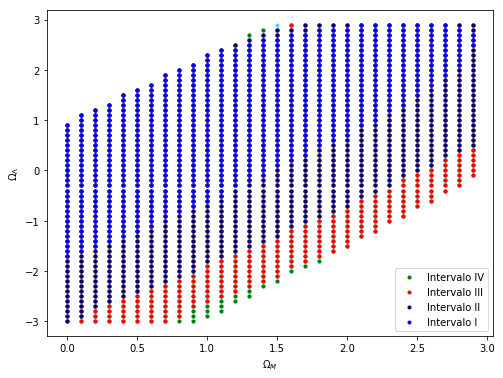

In [980]:
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(gridx,gridy,'.',color="turquoise")
plt.plot(smr[cont4[1],cont4[0]],sor[cont4[1],cont4[0]],'.',color='g',label='Intervalo IV') # se debe poner en orden descendien-
plt.plot(smr[cont3[1],cont3[0]],sor[cont3[1],cont3[0]],'.',color='r',label='Intervalo III') #te para no solapar los puntos de 
plt.plot(smr[cont2[1],cont2[0]],sor[cont2[1],cont2[0]],'.',color='navy',label='Intervalo II') # cont1
plt.plot(smr[cont1[1],cont1[0]],sor[cont1[1],cont1[0]],'.',color='b',label='Intervalo I')

plt.legend(loc='lower right')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')
plt.savefig("punto8_2.pdf")

plt.show()

# Punto 9

Marginalización de datos

In [981]:
P=np.exp(-(shi**2)/2)
P_sm=np.sum(P,axis=0)
P_so=np.sum(P,axis=1)
aP_sm=np.max(P_sm)
aP_so=np.max(P_so)

In [982]:
def cost_function_Probability(z):
    global P_sm,sm,aP_sm
    f=aP_sm*np.exp(-(sm-z[0])**2/(2*z[1]**2))
    ee= np.sum(((f-P_sm)**2),axis=0)
    return ee

def cost_function_Probability_so(z):
    global P_so,so,aP_so
    f=aP_so*np.exp(-(so-z[0])**2/(2*z[1]**2))
    ee= np.sum(((f-P_so)**2),axis=0)
    return ee

In [983]:
z=[0.3,0.5]   # punto inicial
r1=(-10,10)
r2=(-10,10)
bnds=(r1,r2)
sol = minimize(cost_function_Probability,z,method='SLSQP',bounds=bnds)
[mu_m,des_m]=sol.x
sol.x

array([0.37828235, 0.87900186])

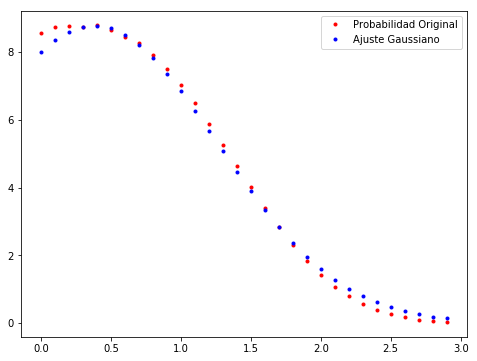

In [984]:
f=aP_sm*np.exp(-(sm-mu_m)**2/(2*des_m**2))
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(sm,P_sm,'.',color="r",label='Probabilidad Original')
plt.plot(sm,f,'.',color="b",label='Ajuste Gaussiano')
plt.legend(loc='upper right')
plt.legend()
plt.savefig("punto9.pdf")
plt.show()


In [986]:
z=[0.7,0.5]   # punto inicial
r1=(-10,10)
r2=(-10,10)
bnds=(r1,r2)
sol_so = minimize(cost_function_Probability_so,z,method='SLSQP',bounds=bnds)
[mu_o,des_o]=sol_so.x
sol_so.x

array([0.92421444, 0.83288019])

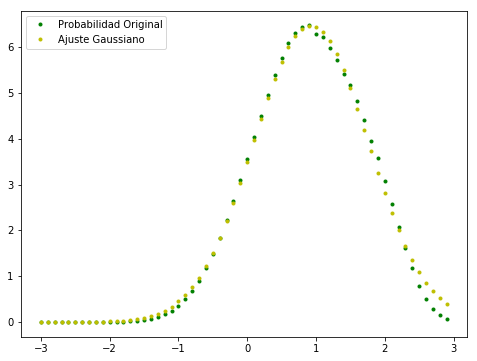

In [987]:
f2=aP_so*np.exp(-(so-mu_o)**2/(2*des_o**2))
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(so,P_so,'g.',color="g",label='Probabilidad Original')
plt.plot(so,f2,'.',color="y",label='Ajuste Gaussiano')

plt.legend(loc='upper left')
plt.legend()
plt.savefig("punto9_b.pdf")
plt.show()


# Punto 10 

## Haciendo filtro de z < 0.3 

In [991]:
indz=(redshift < 0.3)
redshift=redshift[indz]
DL=DL[indz]
error=error[indz]

### Creando matriz $x^2$ con la condición de z < 0.3

In [992]:
shi=np.zeros([len(so),len(sm)])
D=np.zeros((3,1))
for i in np.arange(len(so)):
    for j in np.arange(len(sm)):
        D[0]=smr[j,i]
        D[1]=sor[j,i]
        D[2]=1-D[0]-D[1]
        if ((constraint2(D)>0) and (constraint3(D)>0)):
            shi[i,j]=cost_function(D)
        else:
            shi[i,j]=1e6



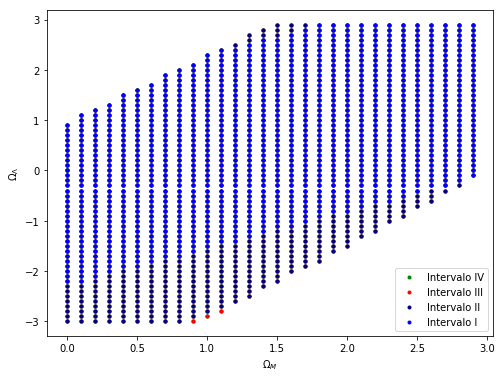

In [993]:
shi=shi/np.min(shi)
cont1=np.where(shi < (np.min(shi)+2.3))
cont2=np.where(shi < (np.min(shi)+4.61))
cont3=np.where(shi < (np.min(shi)+6.17))
cont4=np.where(shi < (np.min(shi)+9.21))

plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(gridx,gridy,'.',color="turquoise")
plt.plot(smr[cont4[1],cont4[0]],sor[cont4[1],cont4[0]],'.',color='g',label='Intervalo IV') # se debe poner en orden descendien-
plt.plot(smr[cont3[1],cont3[0]],sor[cont3[1],cont3[0]],'.',color='r',label='Intervalo III') #te para no solapar los puntos de 
plt.plot(smr[cont2[1],cont2[0]],sor[cont2[1],cont2[0]],'.',color='navy',label='Intervalo II') # cont1
plt.plot(smr[cont1[1],cont1[0]],sor[cont1[1],cont1[0]],'.',color='b',label='Intervalo I')

plt.legend(loc='lower right')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')
plt.savefig("punto10.pdf")
plt.show()



## Ajuste gaussiano con la condición de z < 0.3 

In [994]:
P=np.exp(-(shi**2)/2)
P_sm=np.sum(P,axis=0)
P_so=np.sum(P,axis=1)
aP_sm=np.max(P_sm)
aP_so=np.max(P_so)

In [995]:
z=[0.3,0.5]   # punto inicial
r1=(-10,10)
r2=(-10,10)
bnds=(r1,r2)
sol = minimize(cost_function_Probability,z,method='SLSQP',bounds=bnds)
[mu_m,des_m]=sol.x
sol.x

array([0.82377053, 3.60937687])

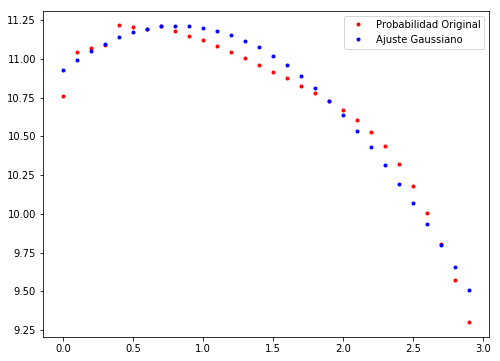

In [996]:
f=aP_sm*np.exp(-(sm-mu_m)**2/(2*des_m**2))
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(sm,P_sm,'.',color="r",label='Probabilidad Original')
plt.plot(sm,f,'.',color="b",label='Ajuste Gaussiano')
plt.legend(loc='upper right')
plt.legend()
plt.savefig("punto10b.pdf")
plt.show()



In [997]:
z=[0.7,0.5]   # punto inicial
r1=(-10,10)
r2=(-10,10)
bnds=(r1,r2)
sol_so = minimize(cost_function_Probability_so,z,method='SLSQP',bounds=bnds)
[mu_o,des_o]=sol_so.x
sol_so.x

array([0.98232307, 0.99264875])

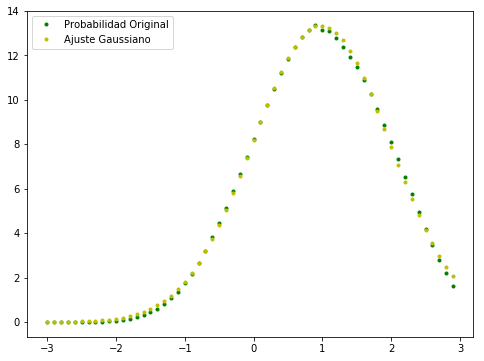

In [921]:
f2=aP_so*np.exp(-(so-mu_o)**2/(2*des_o**2))
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(so,P_so,'g.',color="g",label='Probabilidad Original')
plt.plot(so,f2,'.',color="y",label='Ajuste Gaussiano')

plt.legend(loc='upper left')
plt.legend()
plt.savefig("punto10b2.pdf")
plt.show()

# Punto 11

In [1034]:
def cost_function(S):
    global redshift,DL
    DL6=np.zeros((1,len(DL)))
    for j in np.arange(0,len(DL)):
        r = quad(argI, 0, redshift[j], args=(S[0],S[1],1-S[0]-S[1]))    
        aux= Distance_z(redshift[j],S[0],S[1],1-S[0]-S[1],68,r)
        mu = 5*np.log10(aux)+25   # Mapeando las distancias DL a mu, para poder ajustar con los datos de la tabla
        DL6[0,j]=mu
    aux2= np.sum(np.multiply((DL6-DL)**2,1/error**2),axis=1)
    return aux2

In [1043]:
x = np.array([0.12,0.36])  # Mejor par de parámetros 

tol = [0.01,0.05,0.2]  #perturvaciones
xnS = []
xnR = []

for i in tol:
    temp = x*i
    xnS.append(x+temp)
    xnR.append(x-temp)

xn = xnR + xnS         
Chi_Ref=cost_function(x)    # Chi de referencia
xn

[array([0.1188, 0.3564]),
 array([0.114, 0.342]),
 array([0.096, 0.288]),
 array([0.1212, 0.3636]),
 array([0.126, 0.378]),
 array([0.144, 0.432])]

In [1040]:
chi = np.zeros((6,1))
acum = 0
for i in xn: # iteración a lo largo de Omega_L 
    chi[acum] = cost_function(i) 
    acum = acum + 1
chi_min = chi/Chi_Ref    # Chi perturbados
Pp = np.exp(-chi_min**2/2)
Pp_ref=np.exp(-1/2)
V= Pp/Pp_ref        # analisis de parametros segun Trotta

## Comparación de modelos  

In [1041]:
V

array([[0.99995988],
       [0.99969577],
       [0.99725303],
       [1.0000297 ],
       [1.00004381],
       [0.99857929]])

In [1045]:
Chi_Ref

array([909.31251071])